# Principal Component Analysis for Stellar Classification

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,5)
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd

from pycaret.utils import version
from pycaret.classification import *
import shap

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.4.2
Seaborn version:  0.11.2


In [3]:
# loads csv file into pandas dataframe
df = pd.read_csv("glass.csv")
df = df.drop(columns=['Na','Si','Fe'])
df

,RI,Mg,Al,K,Ca,Ba,Type
0,1.52101,4.49,1.10,0.06,8.75,0.00,1
1,1.51761,3.60,1.36,0.48,7.83,0.00,1
2,1.51618,3.55,1.54,0.39,7.78,0.00,1
3,1.51766,3.69,1.29,0.57,8.22,0.00,1
4,1.51742,3.62,1.24,0.55,8.07,0.00,1
...,...,...,...,...,...,...,...
209,1.51623,0.00,2.88,0.08,9.18,1.06,7
210,1.51685,0.00,1.99,0.00,8.40,1.59,7
211,1.52065,0.00,2.02,0.00,8.44,1.64,7
212,1.51651,0.00,1.94,0.00,8.48,1.57,7


In [4]:
len(df.index)

214

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Mg      214 non-null    float64
 2   Al      214 non-null    float64
 3   K       214 non-null    float64
 4   Ca      214 non-null    float64
 5   Ba      214 non-null    float64
 6   Type    214 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 11.8 KB


### Exploratory Data Analysis

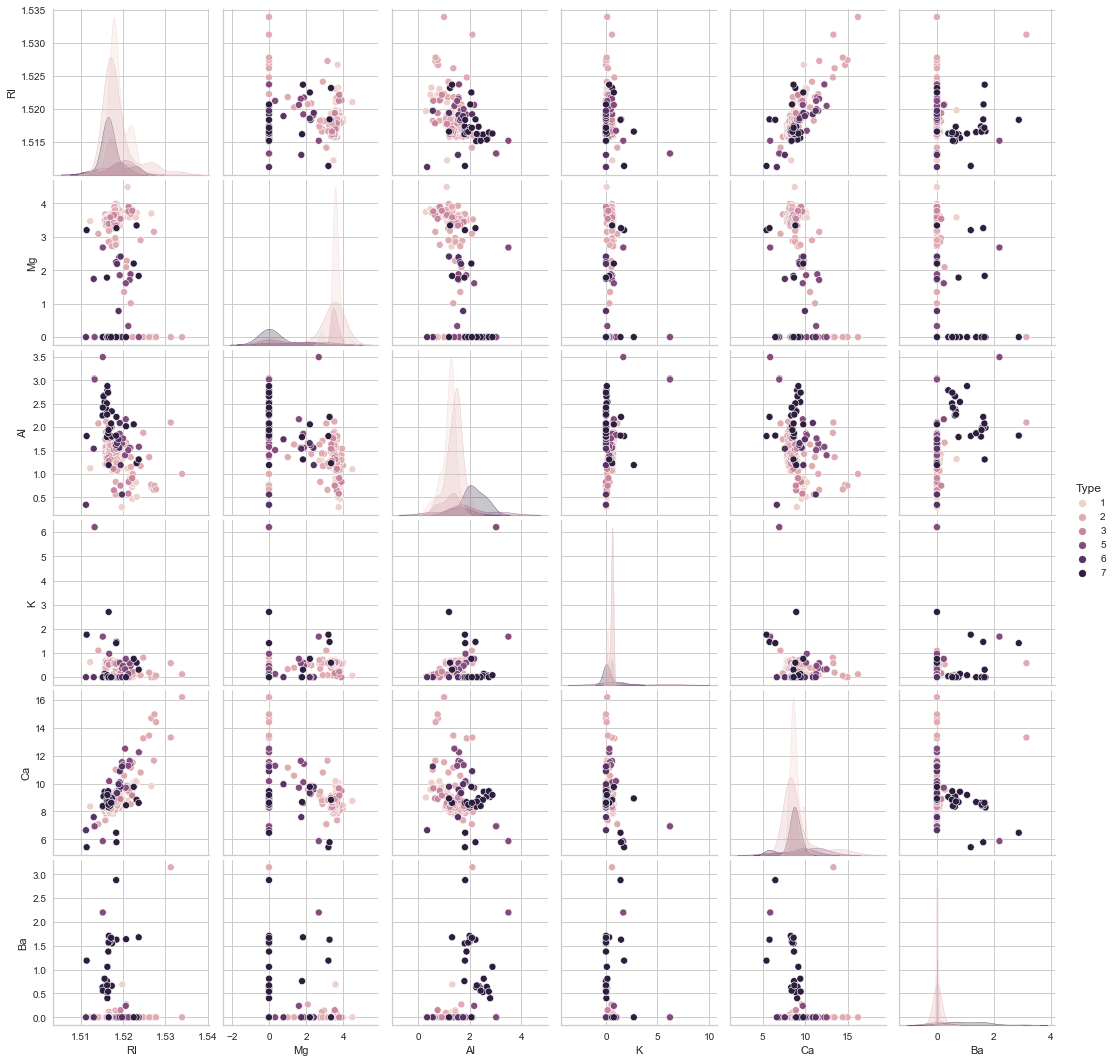

In [6]:
sns.pairplot(df, hue='Type')
plt.show()

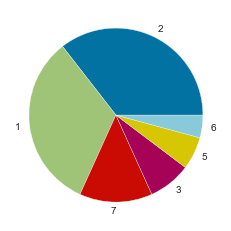

In [7]:
y =df['Type']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

### Data Matrix

In [8]:
X = df.drop(columns=['Type']) #drop column class to standardize data
X.head(10)

,RI,Mg,Al,K,Ca,Ba
0,1.52101,4.49,1.10,0.06,8.75,0.0
1,1.51761,3.60,1.36,0.48,7.83,0.0
2,1.51618,3.55,1.54,0.39,7.78,0.0
3,1.51766,3.69,1.29,0.57,8.22,0.0
4,1.51742,3.62,1.24,0.55,8.07,0.0
5,1.51596,3.61,1.62,0.64,8.07,0.0
6,1.51743,3.60,1.14,0.58,8.17,0.0
7,1.51756,3.61,1.05,0.57,8.24,0.0
8,1.51918,3.58,1.37,0.56,8.30,0.0
9,1.51755,3.60,1.36,0.57,8.40,0.0


### Standardize the Data

In [9]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns                     #to retain the column names after standardization
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,RI,Mg,Al,K,Ca,Ba
0,0.872868,1.254639,-0.692442,-0.671705,-0.145766,-0.352877
1,-0.249333,0.636168,-0.170460,-0.026213,-0.793734,-0.352877
2,-0.721318,0.601422,0.190912,-0.164533,-0.828949,-0.352877
3,-0.232831,0.698710,-0.310994,0.112107,-0.519052,-0.352877
4,-0.312045,0.650066,-0.411375,0.081369,-0.624699,-0.352877
5,-0.793931,0.643117,0.351521,0.219689,-0.624699,-0.352877
6,-0.308744,0.636168,-0.612137,0.127475,-0.554268,-0.352877
7,-0.265836,0.643117,-0.792823,0.112107,-0.504966,-0.352877
8,0.268859,0.622270,-0.150384,0.096738,-0.462707,-0.352877
9,-0.269137,0.636168,-0.170460,0.112107,-0.392276,-0.352877


### Observations and variables

In [10]:
observations = list(df.index)
variables = list(df.columns)

### Box and Whisker Plots

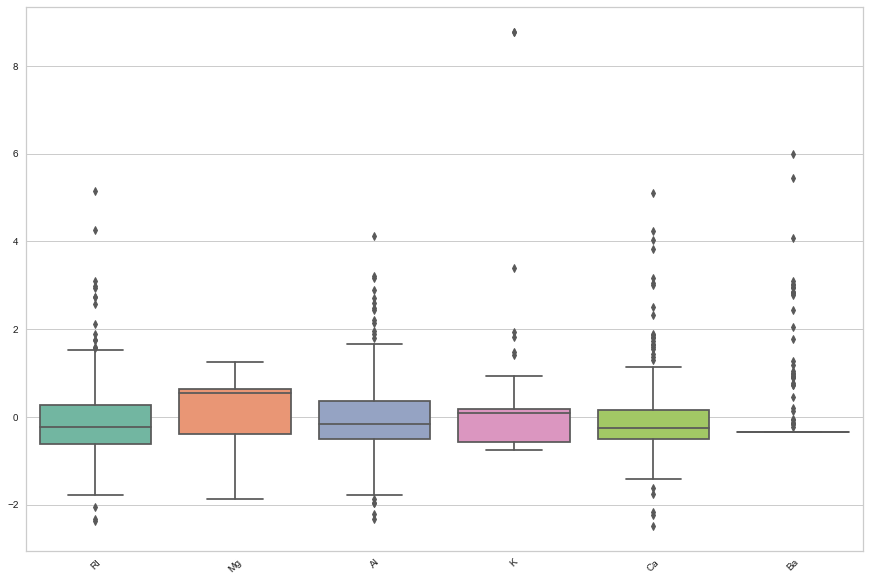

In [11]:
ax = plt.figure(figsize=(15, 10))
ax = sns.boxplot(data=X, orient="v", palette="Set2", showfliers= True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

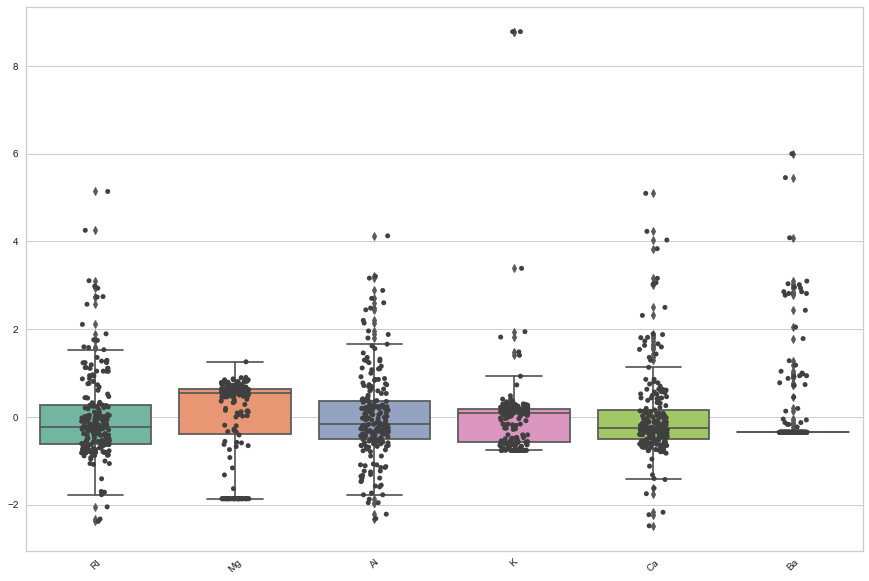

In [12]:


# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

### Correlation Matrix

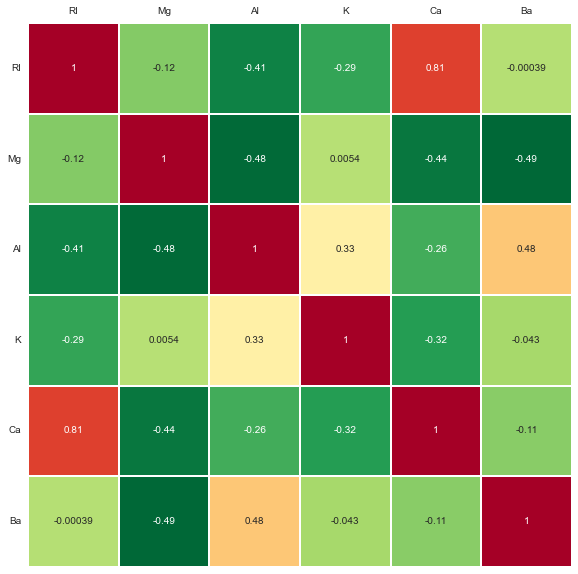

In [13]:
ig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

## Principal Component Analysis (PCA)

Text(0, 0.5, 'Z2')

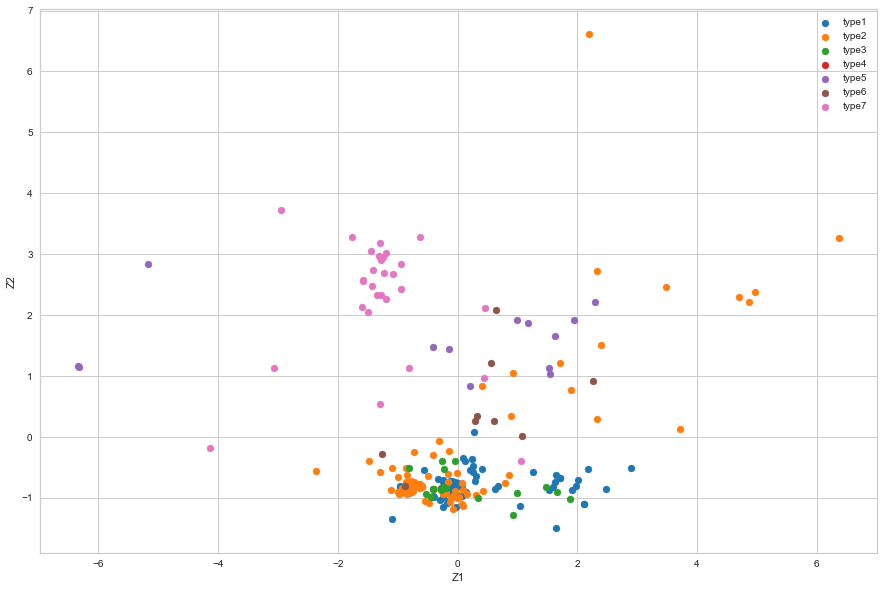

In [14]:
pca = PCA()
Z = pca.fit_transform(X)

idx_type1 = np.where(y==1)
idx_type2 = np.where(y==2)
idx_type3 = np.where(y==3)
idx_type4 = np.where(y==4)
idx_type5 = np.where(y==5)
idx_type6 = np.where(y==6)
idx_type7 = np.where(y==7)

plt. figure(figsize=(15,10))
plt.scatter(Z[idx_type1,0], Z[idx_type1,1], c='#1f77b4', label='type1')
plt.scatter(Z[idx_type2,0], Z[idx_type2,1], c='#ff7f0e', label='type2')
plt.scatter(Z[idx_type3,0], Z[idx_type3,1], c='#2ca02c', label='type3')
plt.scatter(Z[idx_type4,0], Z[idx_type4,1], c='#d62728', label='type4')
plt.scatter(Z[idx_type5,0], Z[idx_type5,1], c='#9467bd', label='type5')
plt.scatter(Z[idx_type6,0], Z[idx_type6,1], c='#8c564b', label='type6')
plt.scatter(Z[idx_type7,0], Z[idx_type7,1], c='#e377c2', label='type7')

plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

### Eigenvectors

array([[ 0.56400996,  0.190087  ,  0.1703443 ,  0.47519537, -0.36130145,
        -0.51028731],
       [ 0.00442655, -0.65350185, -0.1470785 ,  0.36881324, -0.49829019,
         0.40861636],
       [-0.45426976,  0.41241881,  0.09374132, -0.23311977, -0.74859842,
        -0.00422636],
       [-0.36621297, -0.04833993,  0.8208661 ,  0.38826578,  0.17698409,
         0.08750129],
       [ 0.54731057,  0.31242118,  0.29398392, -0.19097921, -0.06761004,
         0.6894733 ],
       [-0.20457603,  0.5164971 , -0.42463585,  0.62976024,  0.15771515,
         0.29931884]])

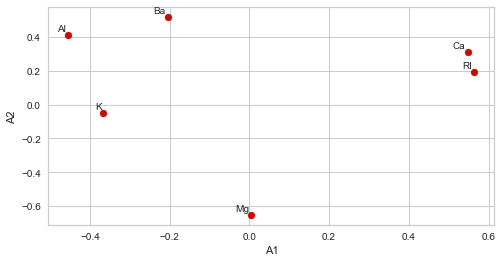

In [15]:
A = pca.components_.T
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

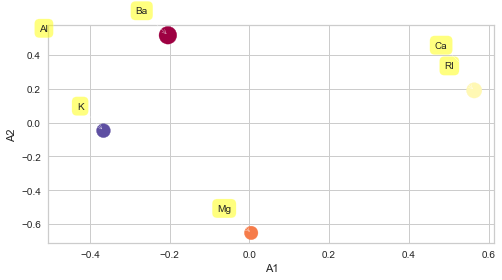

In [16]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

### Scree plot

array([2.3126563 , 1.95034316, 0.88848038, 0.54444663, 0.28251997,
       0.04972258])

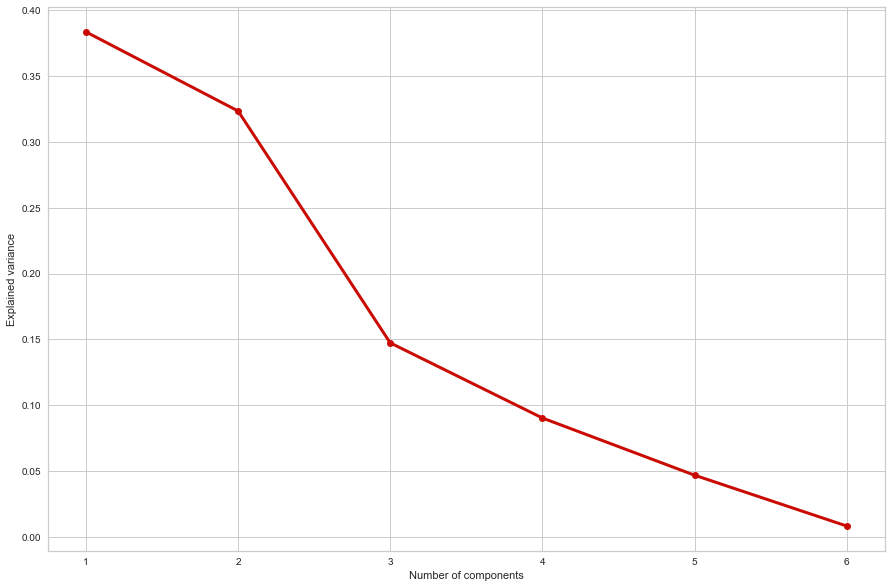

In [17]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

### Explained Variance

Text(0, 0.5, 'Cumulative explained variance')

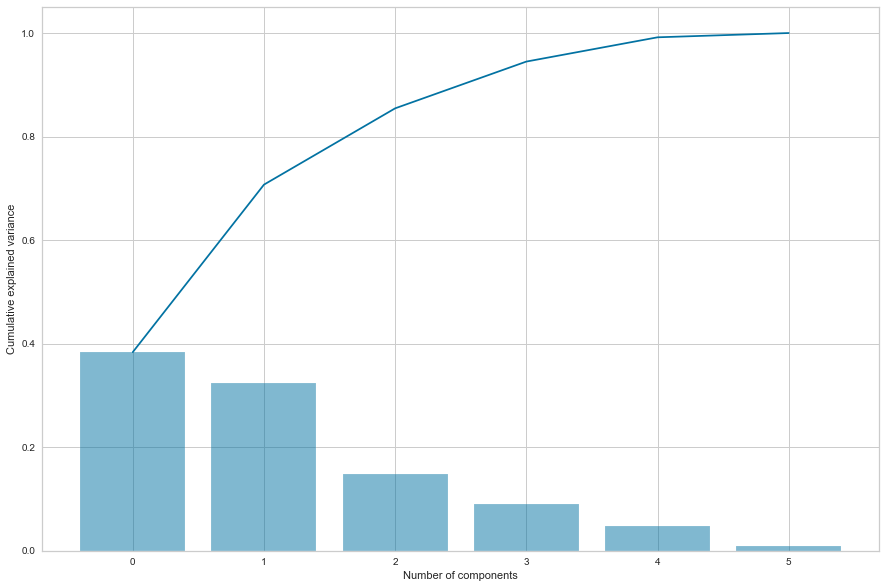

In [18]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

### Biplot

array([-1.13489406, -0.96240499, -0.884696  , -0.97896789, -1.03515621,
       -0.81426887, -1.08846898, -1.14322646, -0.74906459, -0.84743175,
       -0.80934185, -0.91120042, -0.9271894 , -0.91034887, -0.85800907,
       -0.92700071, -0.96358123, -0.87719636, -0.81192026, -0.548468  ,
       -0.6915911 , -1.49696548, -0.86186675, -0.80650404, -0.98605243,
       -0.91607274, -0.72258106, -0.83176352, -0.71418095, -0.82794684,
       -0.8099489 , -0.95544498, -0.7620826 , -0.74231309, -0.74216192,
       -0.98331111, -0.54953634, -0.71845444, -1.10526943, -1.10526943,
       -0.90067839, -0.84684189, -0.72152511, -0.8762893 , -0.8160373 ,
       -0.57673245, -0.72587783, -0.50552265, -0.71380214, -0.64108417,
       -0.8502994 , -0.52316867, -0.48331239, -0.36817406, -0.39131745,
       -0.34646446, -1.34062339, -0.80323233, -1.15185454, -1.04466892,
       -0.85823844,  0.07909017, -0.82520203, -0.80069318, -0.73502976,
       -0.57007776, -0.67947871, -0.67947871, -0.63242348, -0.52

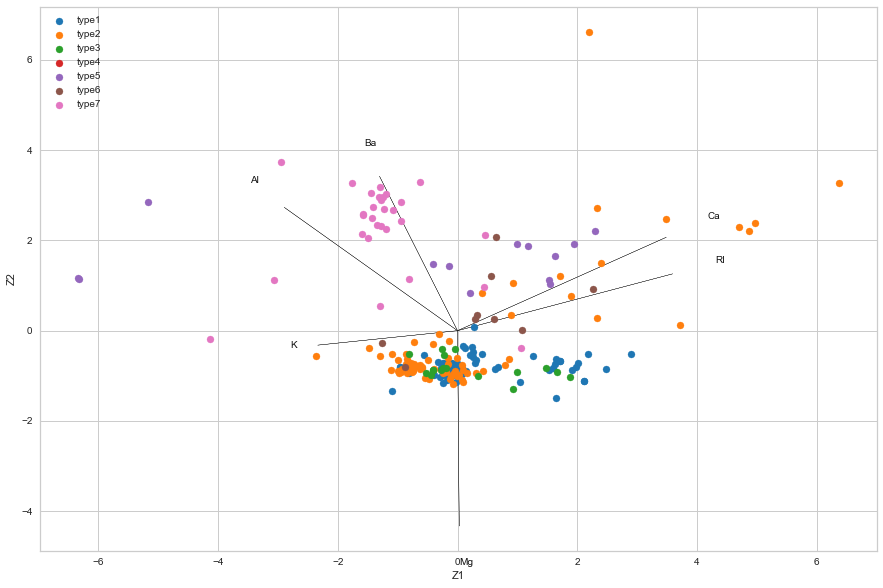

In [19]:
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_type1,0], Z[idx_type1,1], c='#1f77b4', label='type1')
plt.scatter(Z[idx_type2,0], Z[idx_type2,1], c='#ff7f0e', label='type2')
plt.scatter(Z[idx_type3,0], Z[idx_type3,1], c='#2ca02c', label='type3')
plt.scatter(Z[idx_type4,0], Z[idx_type4,1], c='#d62728', label='type4')
plt.scatter(Z[idx_type5,0], Z[idx_type5,1], c='#9467bd', label='type5')
plt.scatter(Z[idx_type6,0], Z[idx_type6,1], c='#8c564b', label='type6')
plt.scatter(Z[idx_type7,0], Z[idx_type7,1], c='#e377c2', label='type7')

plt.legend(loc='upper left')
Z1
Z2

## Using PCA Library

In [20]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [21]:
out['PC']

,PC1,PC2,PC3,PC4,PC5
0,1.050813,-1.134894,-0.545142,0.583742,-0.586861
1,-0.413005,-0.962405,-0.257037,0.075064,-0.105934
2,-0.812142,-0.884696,-0.422346,-0.293258,-0.210714
3,-0.239898,-0.978968,-0.082304,0.139980,-0.031949
4,-0.285756,-1.035156,-0.154343,0.116040,0.097758
...,...,...,...,...,...
209,-1.758841,3.274850,-0.813113,-0.849985,-0.815291
210,-1.305963,2.962996,-1.661872,0.393824,0.632246
211,-0.631129,3.287109,-1.477095,1.033882,0.147998
212,-1.284570,2.897044,-1.656713,0.327747,0.737768


### Scatter plot

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot:title={'center':'5 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (38.3% expl.var)', ylabel='PC2 (32.3% expl.var)'>)

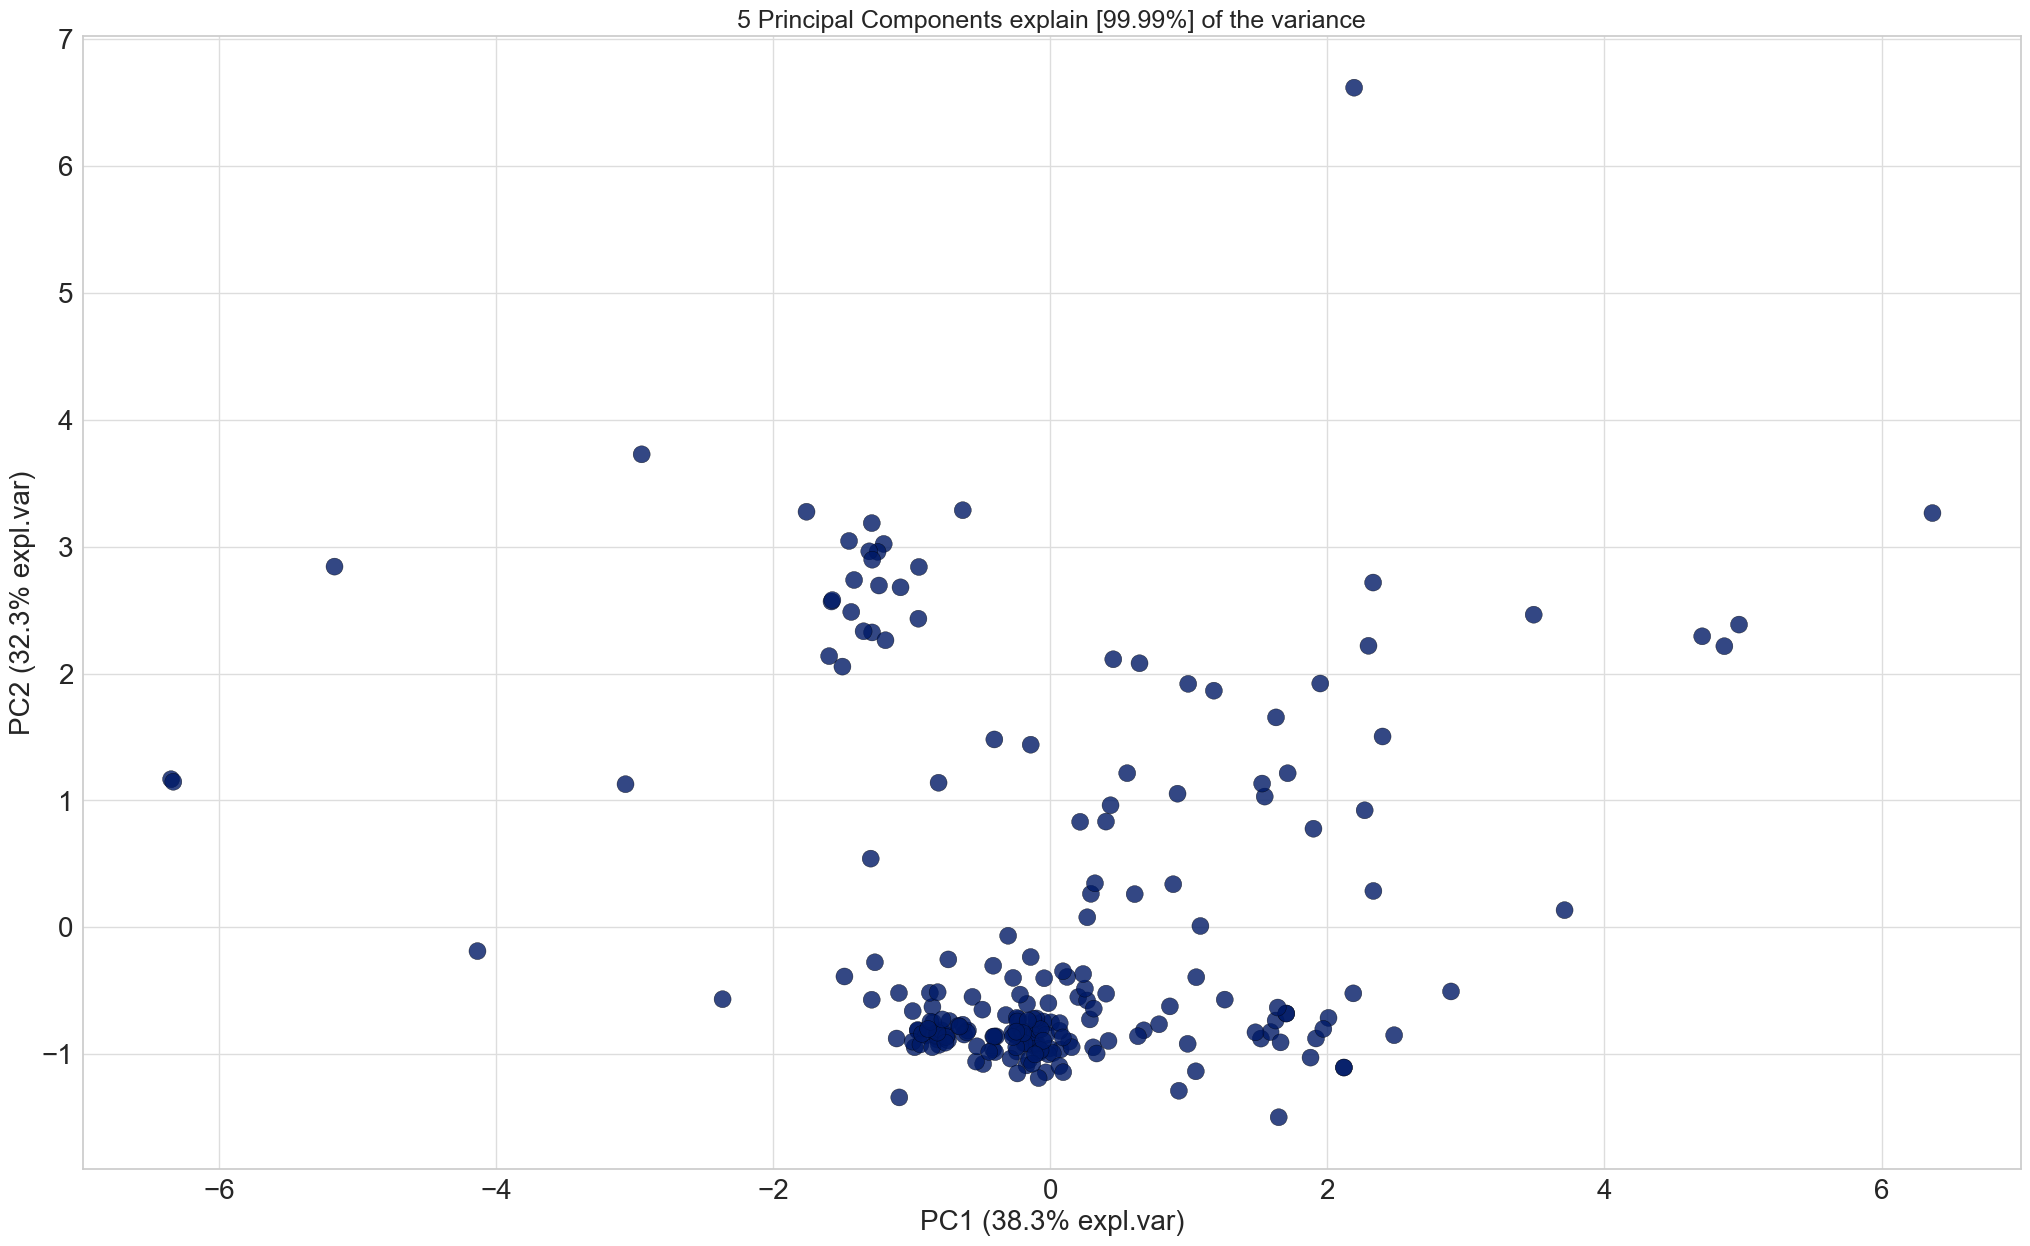

In [22]:
model.scatter(label=True, legend=False)

### Eigenvectors

In [23]:
A = out['loadings'].T
A


,PC1,PC2,PC3,PC4,PC5
RI,0.564010,0.190087,0.170344,0.475195,-0.361301
Mg,0.004427,-0.653502,-0.147078,0.368813,-0.498290
Al,-0.454270,0.412419,0.093741,-0.233120,-0.748598
K,-0.366213,-0.048340,0.820866,0.388266,0.176984
Ca,0.547311,0.312421,0.293984,-0.190979,-0.067610
Ba,-0.204576,0.516497,-0.424636,0.629760,0.157715


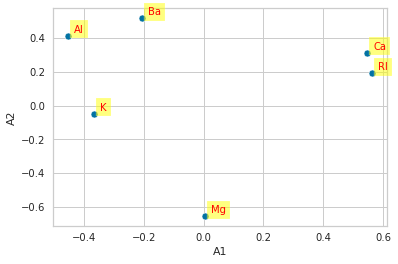

In [24]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

### Scree Plot

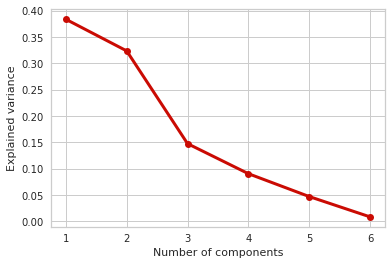

In [25]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

### Explained Variance Plot

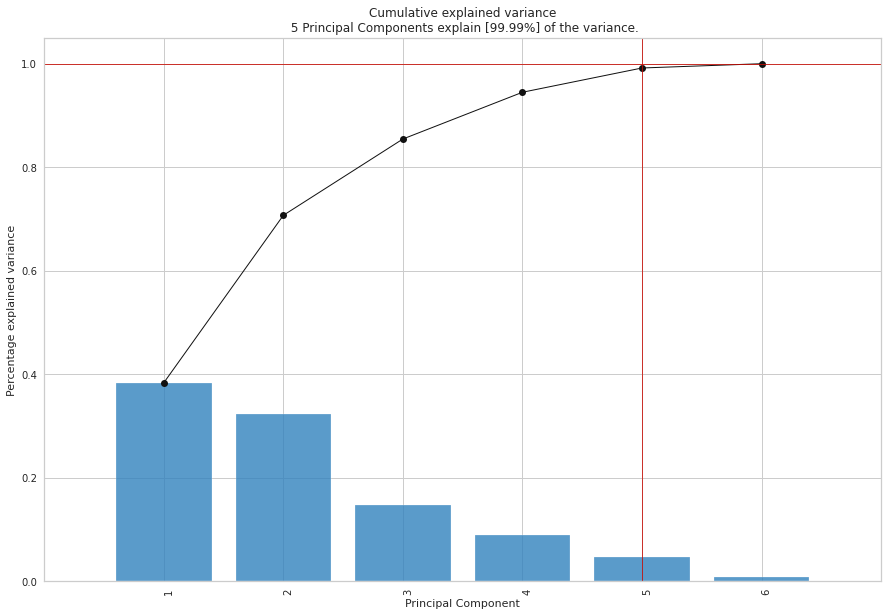

In [26]:
model.plot();

### Biplot

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot:title={'center':'5 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (38.3% expl.var)', ylabel='PC2 (32.3% expl.var)'>)

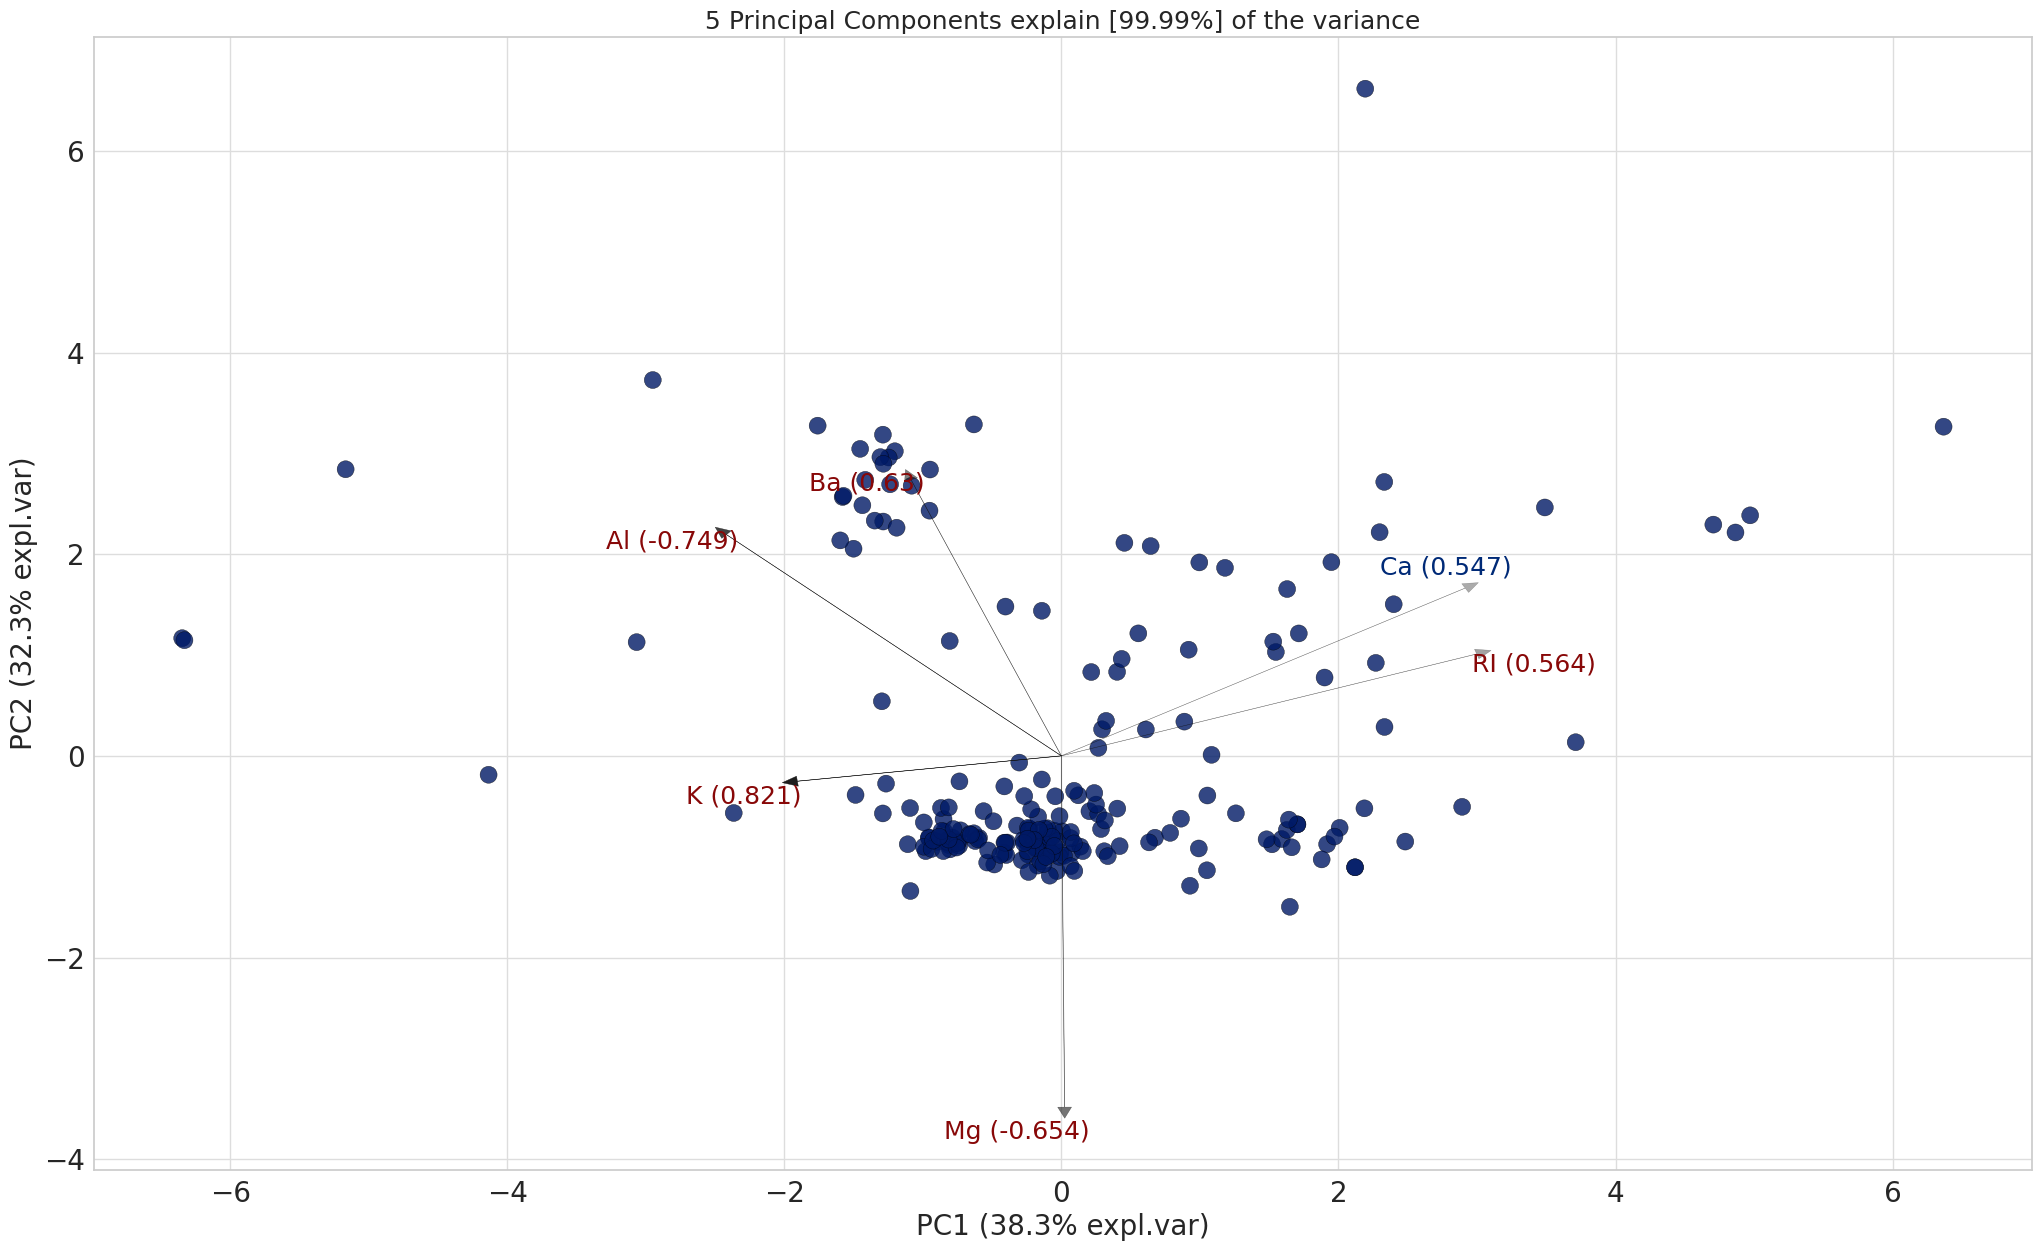

In [27]:
model.biplot(label=False, legend=False, color_arrow='k')

## Classification using Pycaret

In [28]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (193, 7)
Unseen Data For Predictions: (21, 7)


In [29]:
clf = setup(data=data, target='Type', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,Type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5"
4,Original data shape,"(193, 7)"
5,Transformed data shape,"(193, 7)"
6,Transformed train set shape,"(135, 7)"
7,Transformed test set shape,"(58, 7)"
8,Numeric features,6
9,Preprocess,True


### Comparing All Models

In [30]:
#show the best model and their statistics
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7984,0.4656,0.7984,0.7750,0.7717,0.7187,0.7318,0.0970
lightgbm,Light Gradient Boosting Machine,0.7841,0.4663,0.7841,0.7284,0.7481,0.6923,0.7069,0.2830
rf,Random Forest Classifier,0.7621,0.4651,0.7621,0.7377,0.7409,0.6691,0.6793,0.1030
gbc,Gradient Boosting Classifier,0.7467,0.0000,0.7467,0.7059,0.7190,0.6457,0.6563,0.2960
dt,Decision Tree Classifier,0.6797,0.4040,0.6797,0.6869,0.6722,0.5596,0.5696,0.0160
knn,K Neighbors Classifier,0.6665,0.4276,0.6665,0.6159,0.6200,0.5297,0.5481,0.0320
ridge,Ridge Classifier,0.6137,0.0000,0.6137,0.5661,0.5629,0.4527,0.4795,0.0150
lda,Linear Discriminant Analysis,0.6071,0.0000,0.6071,0.5756,0.5739,0.4450,0.4646,0.0180
lr,Logistic Regression,0.5929,0.0000,0.5929,0.5332,0.5543,0.4180,0.4313,1.5680
ada,Ada Boost Classifier,0.5533,0.0000,0.5533,0.4663,0.4940,0.3498,0.3657,0.0560


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [31]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

#### Extra trees classigier

In [32]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7857,0.9274,0.7857,0.7194,0.7341,0.6957,0.7177
1,0.8571,0.9143,0.8571,0.7976,0.8247,0.8056,0.8117
2,0.8571,0.9652,0.8571,0.8000,0.8254,0.8069,0.8128
3,0.7857,0.9315,0.7857,0.7976,0.7603,0.7143,0.7347
4,0.9286,0.0000,0.9286,0.8690,0.8961,0.9014,0.9084
5,0.6923,0.9177,0.6923,0.6000,0.6410,0.5806,0.5914
6,0.6154,0.0000,0.6154,0.7821,0.6464,0.4800,0.5044
7,0.7692,0.0000,0.7692,0.7051,0.7343,0.6518,0.6583
8,0.8462,0.0000,0.8462,0.8974,0.8432,0.7833,0.8034


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

#### Tune the model

In [33]:
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6429,0.8565,0.6429,0.7024,0.6466,0.5205,0.5315
1,0.7143,0.8889,0.7143,0.6893,0.6905,0.6242,0.6327
2,0.6429,0.9216,0.6429,0.6679,0.6508,0.5302,0.5338
3,0.7857,0.9492,0.7857,0.8214,0.7857,0.7181,0.7230
4,0.7857,0.0000,0.7857,0.8095,0.7835,0.7063,0.7115
5,0.6923,0.9167,0.6923,0.6923,0.6923,0.6000,0.6000
6,0.6154,0.0000,0.6154,0.7821,0.6464,0.4800,0.5044
7,0.8462,0.0000,0.8462,0.8974,0.8432,0.7833,0.8034
8,0.8462,0.0000,0.8462,0.8974,0.8432,0.7833,0.8034


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [34]:
tuned_et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [35]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Classification + PCA

In [36]:
clf_pca = setup(data=data, target='Type', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 2)

,Description,Value
0,Session id,123
1,Target,Type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5"
4,Original data shape,"(193, 7)"
5,Transformed data shape,"(193, 3)"
6,Transformed train set shape,"(135, 3)"
7,Transformed test set shape,"(58, 3)"
8,Numeric features,6
9,Preprocess,True


## Comparing Models

In [37]:
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.5934,0.4100,0.5934,0.5589,0.5677,0.4328,0.4416,0.0960
knn,K Neighbors Classifier,0.5841,0.4096,0.5841,0.5339,0.5459,0.4124,0.4272,0.0350
lr,Logistic Regression,0.5791,0.0000,0.5791,0.4976,0.5271,0.3827,0.4003,0.0240
gbc,Gradient Boosting Classifier,0.5780,0.0000,0.5780,0.5607,0.5526,0.4136,0.4314,0.2450
et,Extra Trees Classifier,0.5703,0.3944,0.5703,0.5490,0.5533,0.4020,0.4085,0.0920
ridge,Ridge Classifier,0.5626,0.0000,0.5626,0.4646,0.4938,0.3645,0.3927,0.0230
lda,Linear Discriminant Analysis,0.5484,0.0000,0.5484,0.4897,0.5085,0.3463,0.3605,0.0200
dt,Decision Tree Classifier,0.5401,0.3518,0.5401,0.5395,0.5260,0.3675,0.3780,0.0220
lightgbm,Light Gradient Boosting Machine,0.5324,0.4068,0.5324,0.5105,0.5068,0.3516,0.3630,0.3700
nb,Naive Bayes,0.5044,0.3442,0.5044,0.4251,0.4329,0.2887,0.3228,0.0210


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

## Best model with PCA


In [38]:
best_model_pca

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

## Tune Best Model

In [39]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4286,0.6828,0.4286,0.4643,0.4444,0.2329,0.2345
1,0.5714,0.7067,0.5714,0.4929,0.5281,0.4043,0.4109
2,0.5000,0.7173,0.5000,0.4558,0.4487,0.3288,0.3487
3,0.6429,0.8731,0.6429,0.6774,0.6310,0.5333,0.5480
4,0.6429,0.0000,0.6429,0.5536,0.5714,0.5000,0.5474
5,0.6154,0.7575,0.6154,0.4835,0.5315,0.4628,0.4912
6,0.4615,0.0000,0.4615,0.5192,0.4872,0.2417,0.2479
7,0.6923,0.0000,0.6923,0.7521,0.6484,0.5357,0.6152
8,0.6923,0.0000,0.6923,0.7692,0.7265,0.5667,0.5716


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## Evaluate Best Model

In [40]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Explainable AI with Shapley values

For binary classification, AI shapley can only support tree based classification models. as Light Gradient Boosting Machine is a tree based model we use it for shapley values.

In [41]:
et_pca = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.7872,0.5000,0.4643,0.4726,0.3099,0.3143
1,0.5714,0.7979,0.5714,0.5607,0.5556,0.4362,0.4422
2,0.6429,0.8693,0.6429,0.6429,0.6373,0.5238,0.5311
3,0.5714,0.8241,0.5714,0.5488,0.5508,0.4324,0.4384
4,0.5714,0.0000,0.5714,0.5000,0.5286,0.4043,0.4137
5,0.3846,0.6656,0.3846,0.3385,0.3590,0.1613,0.1643
6,0.3846,0.0000,0.3846,0.3846,0.3846,0.1034,0.1044
7,0.7692,0.0000,0.7692,0.7170,0.7308,0.6518,0.6711
8,0.5385,0.0000,0.5385,0.5385,0.5385,0.3333,0.3362


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [42]:
tuned_et_pca = tune_model(et_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.8114,0.7143,0.5765,0.6310,0.5821,0.6026
1,0.5714,0.8462,0.5714,0.4643,0.5055,0.3824,0.4039
2,0.5714,0.8016,0.5714,0.4405,0.4948,0.3913,0.4052
3,0.5714,0.8716,0.5714,0.4643,0.5091,0.3913,0.4052
4,0.5714,0.0000,0.5714,0.4673,0.5119,0.3869,0.4038
5,0.5385,0.8120,0.5385,0.4410,0.4821,0.3554,0.3698
6,0.3846,0.0000,0.3846,0.4167,0.3963,0.1034,0.1053
7,0.6154,0.0000,0.6154,0.5096,0.5437,0.3981,0.4256
8,0.7692,0.0000,0.7692,0.6593,0.7051,0.6389,0.6608


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [43]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_samples_leaf=5,
                     min_samples_split=10, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [44]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [45]:
!pip install shap

In [46]:
knn = create_model('knn')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6429,0.8407,0.6429,0.5791,0.5952,0.4928,0.5084
1,0.5714,0.8284,0.5714,0.5748,0.5487,0.4286,0.4507
2,0.5714,0.8348,0.5714,0.4371,0.4808,0.4085,0.4316
3,0.6429,0.8454,0.6429,0.5643,0.5952,0.5172,0.5248
4,0.6429,0.0000,0.6429,0.5204,0.5649,0.4964,0.5257
5,0.4615,0.7468,0.4615,0.4000,0.4274,0.2661,0.2711
6,0.3846,0.0000,0.3846,0.3846,0.3846,0.1034,0.1044
7,0.6154,0.0000,0.6154,0.6026,0.5828,0.4196,0.4501
8,0.6923,0.0000,0.6923,0.6603,0.6643,0.5517,0.5615


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [47]:
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6429,0.8053,0.6429,0.5791,0.5952,0.4928,0.5084
1,0.6429,0.8078,0.6429,0.5893,0.6000,0.5205,0.5357
2,0.5714,0.8614,0.5714,0.4371,0.4808,0.4085,0.4316
3,0.6429,0.9179,0.6429,0.5893,0.6000,0.5205,0.5357
4,0.6429,0.0000,0.6429,0.5204,0.5649,0.4964,0.5257
5,0.5385,0.8291,0.5385,0.4615,0.4923,0.3710,0.3812
6,0.4615,0.0000,0.4615,0.4762,0.4487,0.2155,0.2255
7,0.6923,0.0000,0.6923,0.7521,0.6484,0.5357,0.6152
8,0.6923,0.0000,0.6923,0.6603,0.6643,0.5517,0.5615


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [48]:
tuned_knn


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
                     weights='uniform')

In [49]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [50]:
import shap

In [51]:
qda=create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5714,0.0000,0.5714,0.4484,0.4853,0.3538,0.3899
1,0.5714,0.0000,0.5714,0.4643,0.4921,0.4000,0.4350
2,0.3571,0.0000,0.3571,0.1857,0.2347,0.1127,0.1402
3,0.3571,0.0000,0.3571,0.3393,0.3175,0.1064,0.1155
4,0.3571,0.0000,0.3571,0.2286,0.2653,0.1127,0.1412
5,0.5385,0.0000,0.5385,0.4103,0.4469,0.3554,0.3932
6,0.4615,0.0000,0.4615,0.4121,0.4274,0.1875,0.1950
7,0.5385,0.0000,0.5385,0.4615,0.4432,0.2778,0.3482
8,0.5385,0.0000,0.5385,0.4615,0.4432,0.2778,0.3482


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [52]:
tuned_qda=tune_model(qda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.0000,0.7143,0.5646,0.6288,0.5692,0.5921
1,0.6429,0.0000,0.6429,0.5184,0.5714,0.4891,0.5070
2,0.5000,0.0000,0.5000,0.4286,0.4286,0.2847,0.3114
3,0.5000,0.0000,0.5000,0.4643,0.4615,0.2950,0.3051
4,0.6429,0.0000,0.6429,0.5536,0.5714,0.5000,0.5474
5,0.5385,0.0000,0.5385,0.4308,0.4752,0.3554,0.3698
6,0.6154,0.0000,0.6154,0.6044,0.5983,0.4196,0.4364
7,0.6154,0.0000,0.6154,0.5470,0.5440,0.3981,0.4521
8,0.7692,0.0000,0.7692,0.6593,0.7051,0.6389,0.6608


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [53]:
tuned_qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.66,
                              store_covariance=False, tol=0.0001)

In [54]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [55]:
!pip install statsmodels --upgrade

  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.2
    Uninstalling patsy-0.5.2:
      Successfully uninstalled patsy-0.5.2
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.2
    Uninstalling statsmodels-0.13.2:
      Successfully uninstalled statsmodels-0.13.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
sktime 0.26.0 requires numpy<1.27,>=1.21, but you have numpy 2.0.2 which is incompatible.
pycaret 3.3.2 requires numpy<1.27,>=1.21, but you have numpy 2.0.2 which is incompatible.
pycaret 3.3.2 requires scipy<=1.11.4,>=1.6.1, but you have scipy 1.13.1 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 2.0.2 which is incompatible.


In [56]:
clf_pca = setup(data=data, target='Type', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 2)

,Description,Value
0,Session id,123
1,Target,Type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5"
4,Original data shape,"(193, 7)"
5,Transformed data shape,"(193, 3)"
6,Transformed train set shape,"(135, 3)"
7,Transformed test set shape,"(58, 3)"
8,Numeric features,6
9,Preprocess,True


In [57]:

#show the best model and their statistics
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.5934,0.4100,0.5934,0.5589,0.5677,0.4328,0.4416,0.1200
knn,K Neighbors Classifier,0.5841,0.4096,0.5841,0.5339,0.5459,0.4124,0.4272,0.0340
lr,Logistic Regression,0.5791,0.0000,0.5791,0.4976,0.5271,0.3827,0.4003,0.0240
gbc,Gradient Boosting Classifier,0.5780,0.0000,0.5780,0.5607,0.5526,0.4136,0.4314,0.3040
et,Extra Trees Classifier,0.5703,0.3944,0.5703,0.5490,0.5533,0.4020,0.4085,0.1180
ridge,Ridge Classifier,0.5626,0.0000,0.5626,0.4646,0.4938,0.3645,0.3927,0.0220
lda,Linear Discriminant Analysis,0.5484,0.0000,0.5484,0.4897,0.5085,0.3463,0.3605,0.0240
dt,Decision Tree Classifier,0.5401,0.3518,0.5401,0.5395,0.5260,0.3675,0.3780,0.0230
lightgbm,Light Gradient Boosting Machine,0.5324,0.4068,0.5324,0.5105,0.5068,0.3516,0.3630,0.2760
nb,Naive Bayes,0.5044,0.3442,0.5044,0.4251,0.4329,0.2887,0.3228,0.0230


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [58]:
best_model_pca

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [59]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4286,0.6828,0.4286,0.4643,0.4444,0.2329,0.2345
1,0.5714,0.7067,0.5714,0.4929,0.5281,0.4043,0.4109
2,0.5000,0.7173,0.5000,0.4558,0.4487,0.3288,0.3487
3,0.6429,0.8731,0.6429,0.6774,0.6310,0.5333,0.5480
4,0.6429,0.0000,0.6429,0.5536,0.5714,0.5000,0.5474
5,0.6154,0.7575,0.6154,0.4835,0.5315,0.4628,0.4912
6,0.4615,0.0000,0.4615,0.5192,0.4872,0.2417,0.2479
7,0.6923,0.0000,0.6923,0.7521,0.6484,0.5357,0.6152
8,0.6923,0.0000,0.6923,0.7692,0.7265,0.5667,0.5716


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [60]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [61]:
lr_pca = create_model('lr')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5714,0.0000,0.5714,0.4541,0.5000,0.3731,0.3863
1,0.5000,0.0000,0.5000,0.3968,0.4286,0.2741,0.3011
2,0.4286,0.0000,0.4286,0.4048,0.3912,0.1579,0.1744
3,0.5714,0.0000,0.5714,0.4643,0.5091,0.3913,0.4052
4,0.6429,0.0000,0.6429,0.5357,0.5769,0.4853,0.5161
5,0.5385,0.0000,0.5385,0.4410,0.4821,0.3554,0.3698
6,0.5385,0.0000,0.5385,0.5000,0.5175,0.3036,0.3096
7,0.6154,0.0000,0.6154,0.5096,0.5437,0.3981,0.4256
8,0.7692,0.0000,0.7692,0.6538,0.7063,0.6389,0.6539


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [62]:
tuned_lr_pca = tune_model(lr_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6429,0.0000,0.6429,0.5119,0.5671,0.4776,0.4903
1,0.5000,0.0000,0.5000,0.3968,0.4286,0.2741,0.3011
2,0.4286,0.0000,0.4286,0.3388,0.3770,0.1825,0.1892
3,0.5714,0.0000,0.5714,0.4643,0.5091,0.3913,0.4052
4,0.6429,0.0000,0.6429,0.5357,0.5769,0.4853,0.5161
5,0.5385,0.0000,0.5385,0.4410,0.4821,0.3554,0.3698
6,0.5385,0.0000,0.5385,0.5000,0.5175,0.3036,0.3096
7,0.6154,0.0000,0.6154,0.5096,0.5437,0.3981,0.4256
8,0.7692,0.0000,0.7692,0.6978,0.7137,0.6518,0.6778


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [63]:
tuned_lr_pca


LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
evaluate_model(tuned_lr_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [65]:
knn_pca = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6429,0.8407,0.6429,0.5791,0.5952,0.4928,0.5084
1,0.5714,0.8284,0.5714,0.5748,0.5487,0.4286,0.4507
2,0.5714,0.8348,0.5714,0.4371,0.4808,0.4085,0.4316
3,0.6429,0.8454,0.6429,0.5643,0.5952,0.5172,0.5248
4,0.6429,0.0000,0.6429,0.5204,0.5649,0.4964,0.5257
5,0.4615,0.7468,0.4615,0.4000,0.4274,0.2661,0.2711
6,0.3846,0.0000,0.3846,0.3846,0.3846,0.1034,0.1044
7,0.6154,0.0000,0.6154,0.6026,0.5828,0.4196,0.4501
8,0.6923,0.0000,0.6923,0.6603,0.6643,0.5517,0.5615


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [66]:
tuned_knn_pca = tune_model(knn_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6429,0.8053,0.6429,0.5791,0.5952,0.4928,0.5084
1,0.6429,0.8078,0.6429,0.5893,0.6000,0.5205,0.5357
2,0.5714,0.8614,0.5714,0.4371,0.4808,0.4085,0.4316
3,0.6429,0.9179,0.6429,0.5893,0.6000,0.5205,0.5357
4,0.6429,0.0000,0.6429,0.5204,0.5649,0.4964,0.5257
5,0.5385,0.8291,0.5385,0.4615,0.4923,0.3710,0.3812
6,0.4615,0.0000,0.4615,0.4762,0.4487,0.2155,0.2255
7,0.6923,0.0000,0.6923,0.7521,0.6484,0.5357,0.6152
8,0.6923,0.0000,0.6923,0.6603,0.6643,0.5517,0.5615


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [67]:
tuned_knn_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
                     weights='uniform')

In [68]:
evaluate_model(tuned_knn_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [69]:
qda_pca = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5714,0.0000,0.5714,0.4484,0.4853,0.3538,0.3899
1,0.5714,0.0000,0.5714,0.4643,0.4921,0.4000,0.4350
2,0.3571,0.0000,0.3571,0.1857,0.2347,0.1127,0.1402
3,0.3571,0.0000,0.3571,0.3393,0.3175,0.1064,0.1155
4,0.3571,0.0000,0.3571,0.2286,0.2653,0.1127,0.1412
5,0.5385,0.0000,0.5385,0.4103,0.4469,0.3554,0.3932
6,0.4615,0.0000,0.4615,0.4121,0.4274,0.1875,0.1950
7,0.5385,0.0000,0.5385,0.4615,0.4432,0.2778,0.3482
8,0.5385,0.0000,0.5385,0.4615,0.4432,0.2778,0.3482


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [70]:
tuned_qda_pca = tune_model(qda_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.0000,0.7143,0.5646,0.6288,0.5692,0.5921
1,0.6429,0.0000,0.6429,0.5184,0.5714,0.4891,0.5070
2,0.5000,0.0000,0.5000,0.4286,0.4286,0.2847,0.3114
3,0.5000,0.0000,0.5000,0.4643,0.4615,0.2950,0.3051
4,0.6429,0.0000,0.6429,0.5536,0.5714,0.5000,0.5474
5,0.5385,0.0000,0.5385,0.4308,0.4752,0.3554,0.3698
6,0.6154,0.0000,0.6154,0.6044,0.5983,0.4196,0.4364
7,0.6154,0.0000,0.6154,0.5470,0.5440,0.3981,0.4521
8,0.7692,0.0000,0.7692,0.6593,0.7051,0.6389,0.6608


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [71]:
tuned_qda_pca


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.66,
                              store_covariance=False, tol=0.0001)

In [72]:
evaluate_model(tuned_qda_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [73]:
et_pca = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.7872,0.5000,0.4643,0.4726,0.3099,0.3143
1,0.5714,0.7979,0.5714,0.5607,0.5556,0.4362,0.4422
2,0.6429,0.8693,0.6429,0.6429,0.6373,0.5238,0.5311
3,0.5714,0.8241,0.5714,0.5488,0.5508,0.4324,0.4384
4,0.5714,0.0000,0.5714,0.5000,0.5286,0.4043,0.4137
5,0.3846,0.6656,0.3846,0.3385,0.3590,0.1613,0.1643
6,0.3846,0.0000,0.3846,0.3846,0.3846,0.1034,0.1044
7,0.7692,0.0000,0.7692,0.7170,0.7308,0.6518,0.6711
8,0.5385,0.0000,0.5385,0.5385,0.5385,0.3333,0.3362


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [74]:

tuned_et_pca = tune_model(et_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.8114,0.7143,0.5765,0.6310,0.5821,0.6026
1,0.5714,0.8462,0.5714,0.4643,0.5055,0.3824,0.4039
2,0.5714,0.8016,0.5714,0.4405,0.4948,0.3913,0.4052
3,0.5714,0.8716,0.5714,0.4643,0.5091,0.3913,0.4052
4,0.5714,0.0000,0.5714,0.4673,0.5119,0.3869,0.4038
5,0.5385,0.8120,0.5385,0.4410,0.4821,0.3554,0.3698
6,0.3846,0.0000,0.3846,0.4167,0.3963,0.1034,0.1053
7,0.6154,0.0000,0.6154,0.5096,0.5437,0.3981,0.4256
8,0.7692,0.0000,0.7692,0.6593,0.7051,0.6389,0.6608


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [75]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_samples_leaf=5,
                     min_samples_split=10, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [76]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…